# Quick look summaries of the mouse and human atalas datasets

In [1]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd

import random
import os
import seaborn as sns

In [2]:
WORKDIR="/workdir/dwm269/scMuscle2"
os.chdir(WORKDIR)

In [3]:
from scripts.py.scantils import *
# from scripts.py.scanplots import *

Load mouse data...

In [4]:
mouse = sc.read_h5ad("data/atlas/mus_musculus.h5ad")
mouse.shape

(1802328, 56980)

*Note* - loading both datasets requires ~100Gb of RAM

Quick preprocessing on each dataset for visualization

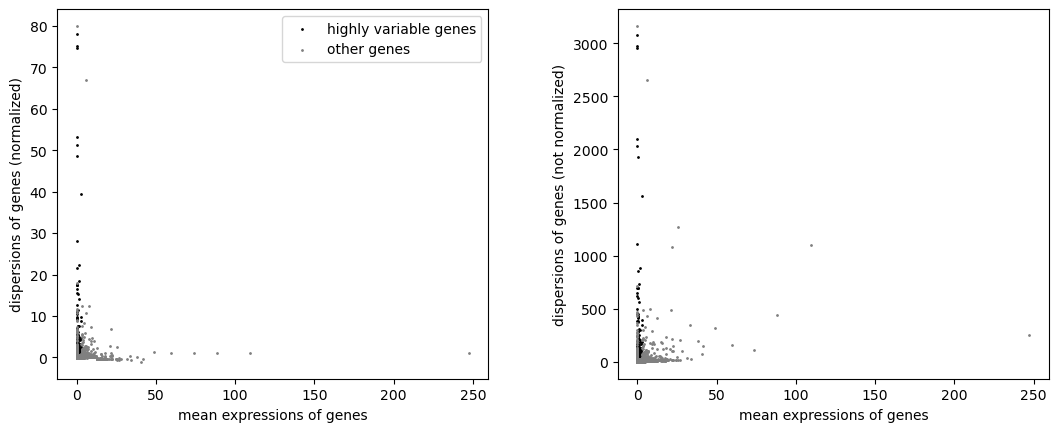

In [5]:
sc.pp.recipe_seurat(
    mouse,
    plot=True
)

In [6]:
sc.tl.pca(
    mouse,
    svd_solver='arpack'
)

In [7]:
sc.pp.neighbors(
    mouse,
    n_pcs=50
)

In [8]:
sc.tl.umap(
    mouse
)

Set color map for 'GSM.accession' values (sample IDs)

In [9]:
palette=sns.color_palette(
    "hls", 
    len(mouse.obs["GSM.accession"].unique())
)
random.shuffle(palette)
mouse.uns['GSM.accession_colors'] =  ["#{:02x}{:02x}{:02x}".format(int(r * 255), int(g * 255), int(b * 255)) for r, g, b in palette]

Plot the UMAP!

/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


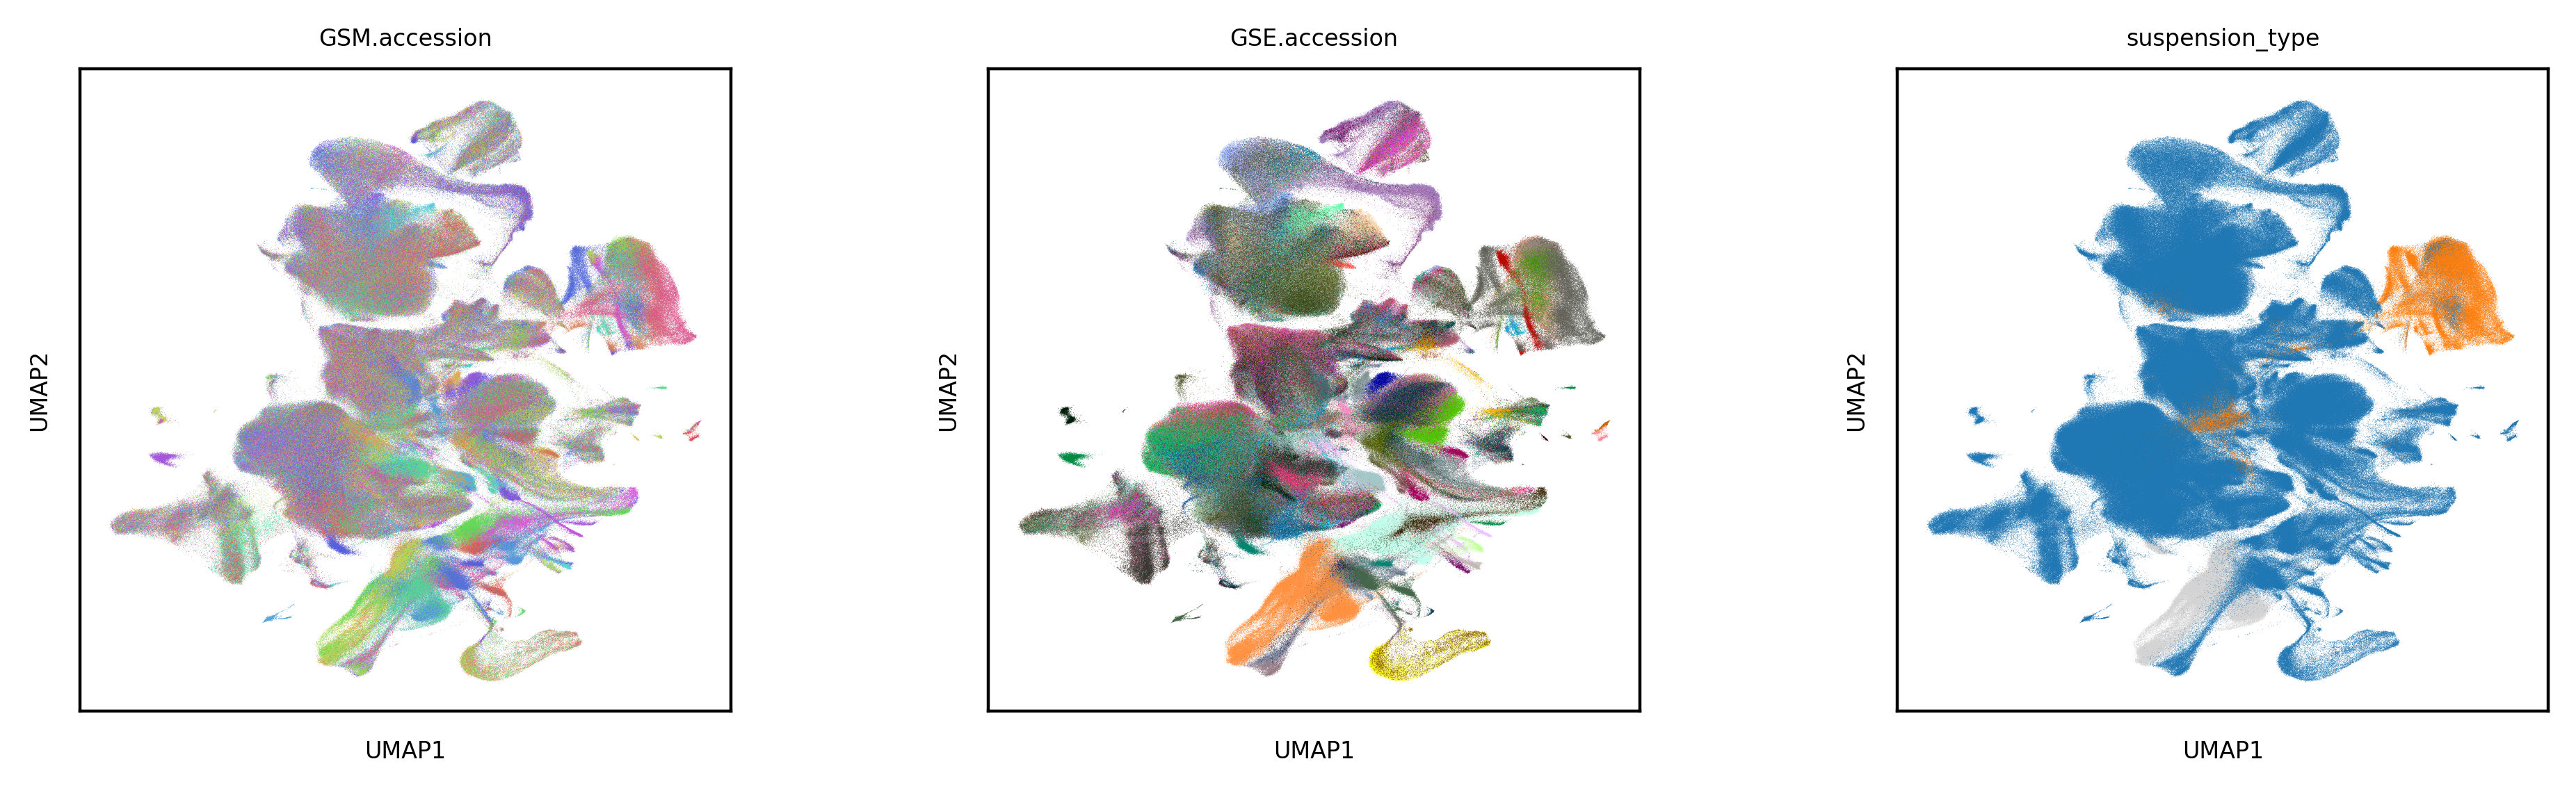

In [10]:
sc.set_figure_params(
    figsize=(3,3),
    fontsize=6,
    transparent=False,
    dpi=200,
    dpi_save=400
)

sc.pl.umap(
    mouse,
    legend_loc=None, #"on data"
    # palette=sns.color_palette(
    #     "hls", 
    #     len(mouse.obs["GSM.accession"].unique())
    # ),
    color=["GSM.accession","GSE.accession","suspension_type"],
    save="mouse_gsm_umap.png"
)

Repeat w/ human dataset...

Load human data...

In [11]:
human = sc.read_h5ad("data/atlas/homo_sapiens.h5ad")
human.shape

(1146214, 62703)

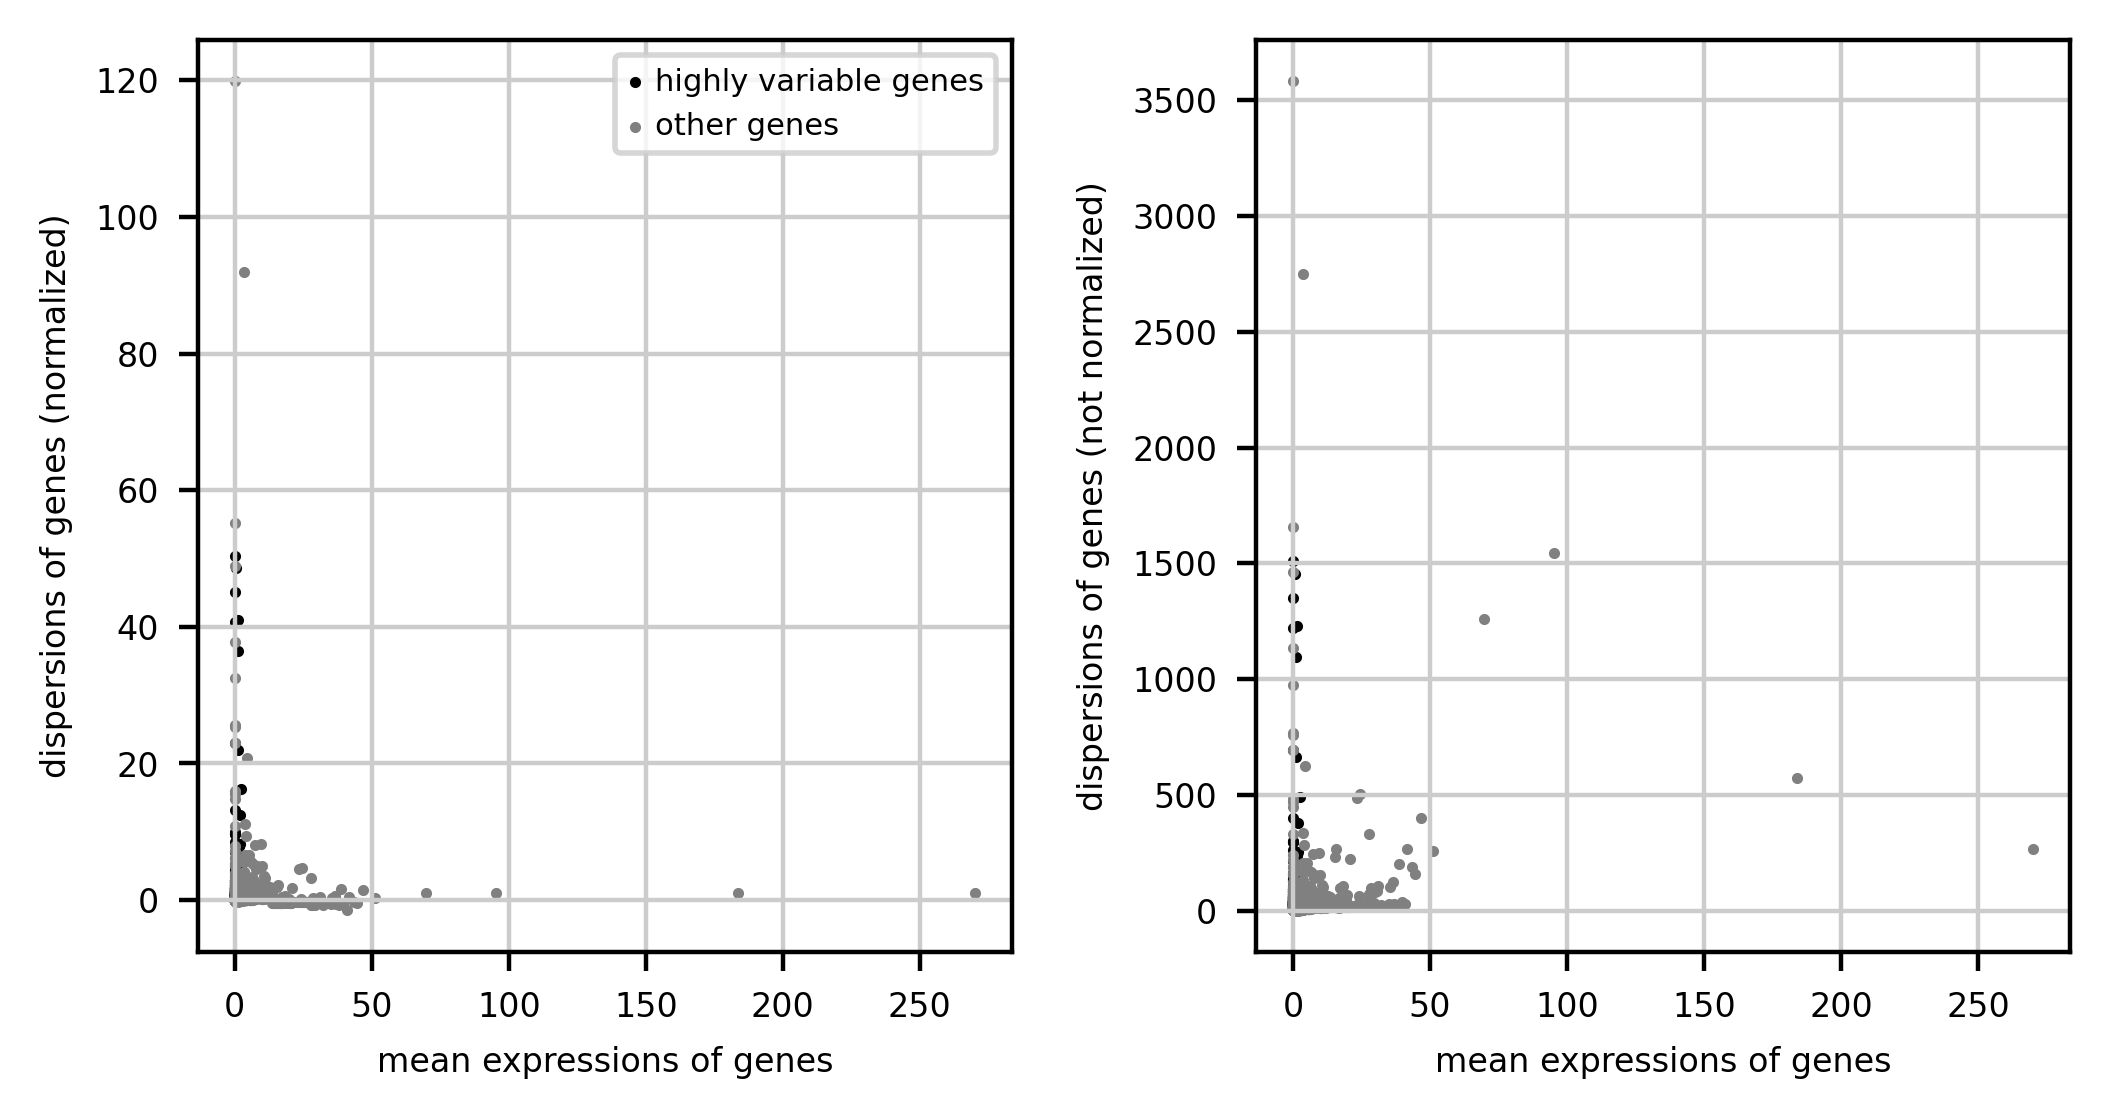

In [12]:
sc.pp.recipe_seurat(
    human,
    plot=True
)

In [13]:
sc.tl.pca(
    human,
    svd_solver='arpack'
)

In [14]:
sc.pp.neighbors(
    human,
    n_pcs=50
)

In [15]:
sc.tl.umap(
    human
)

In [16]:
palette=sns.color_palette(
    "hls", 
    len(human.obs["GSM.accession"].unique())
)
random.shuffle(palette)
human.uns['GSM.accession_colors'] =  ["#{:02x}{:02x}{:02x}".format(int(r * 255), int(g * 255), int(b * 255)) for r, g, b in palette]

/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


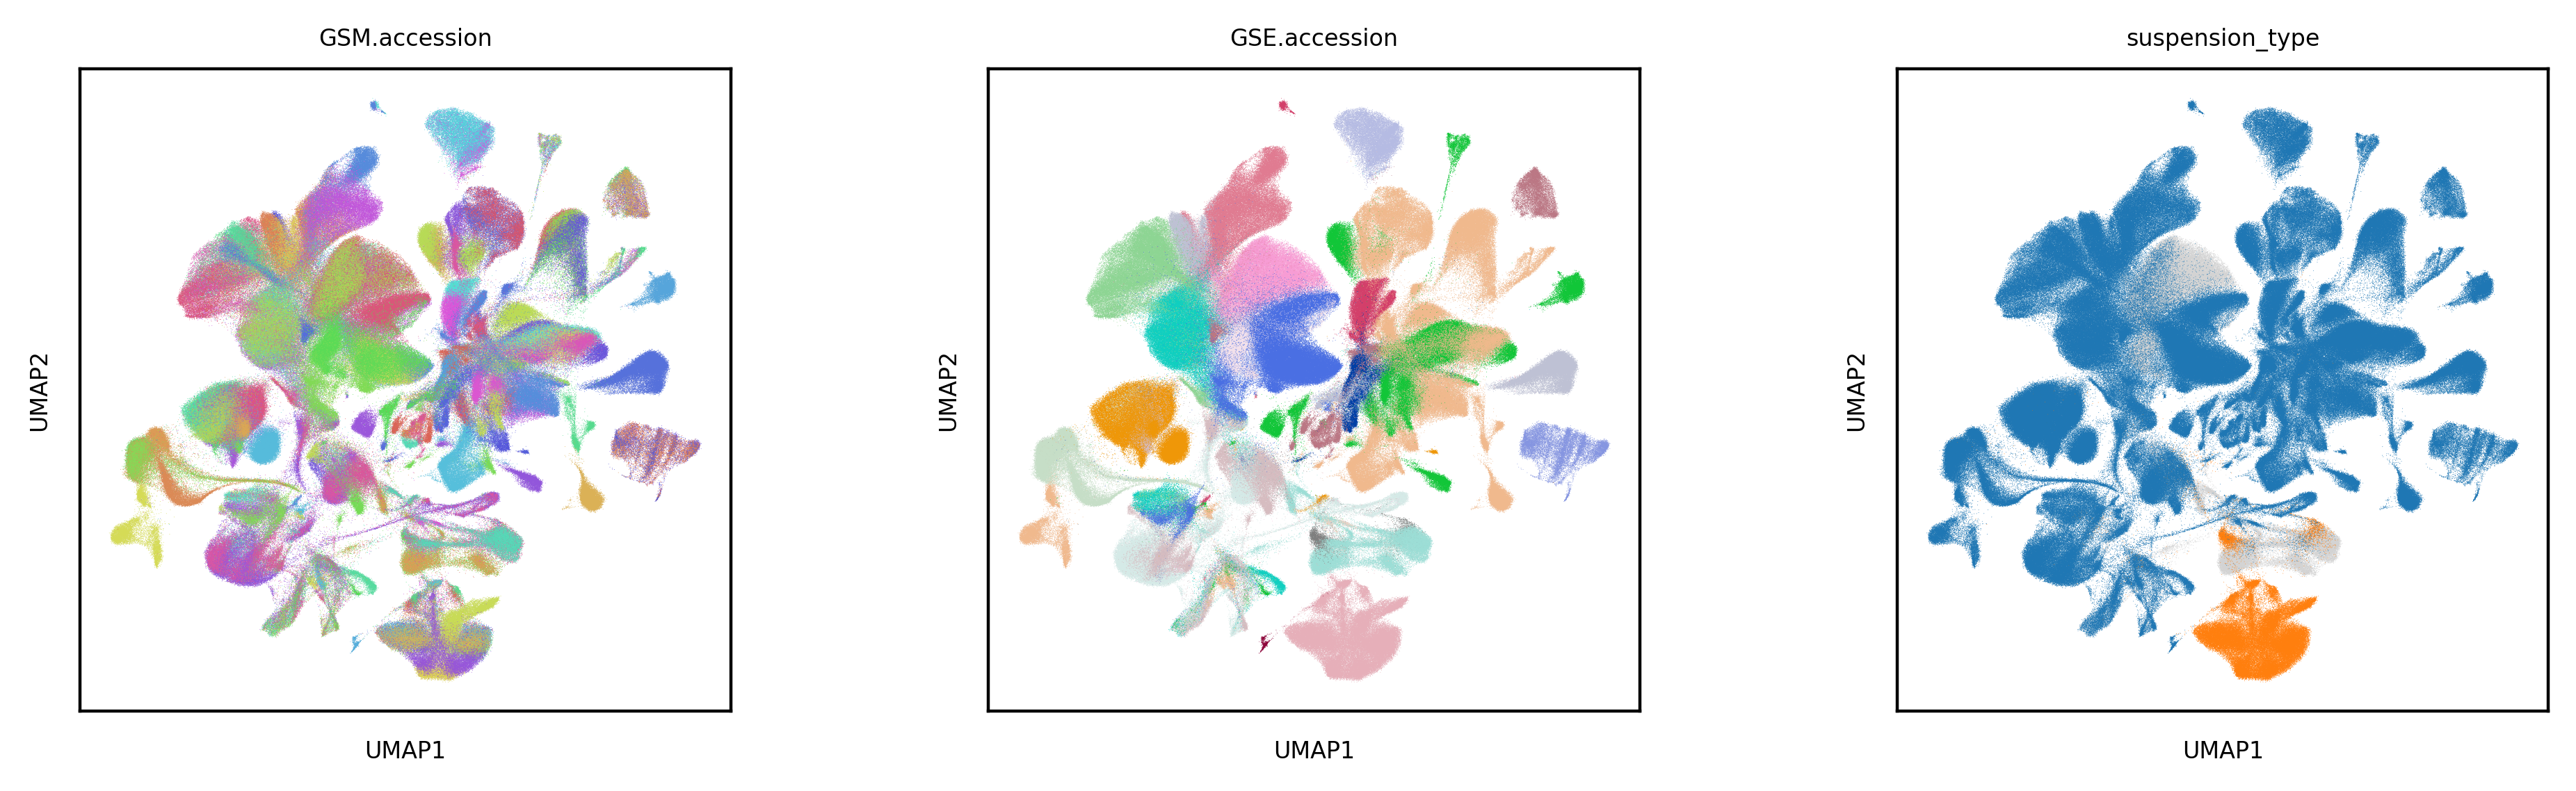

In [17]:
sc.set_figure_params(
    figsize=(3,3),
    fontsize=6,
    transparent=False,
    dpi=200,
    dpi_save=400
)

sc.pl.umap(
    human,
    legend_loc=None, # "right margin", #"on data"
    # palette=sns.color_palette(
    #     "hls", 
    #     len(human.obs["GSM.accession"].unique())
    # ),
    color=["GSM.accession","GSE.accession","suspension_type"],
    save="human_gsm_umap.png"
)

Export datasets

In [18]:
mouse.write_h5ad(
    "data/atlas/mus_musculus_pp.h5ad"
)

In [19]:
human.write_h5ad(
    "data/atlas/homo_sapiens_pp.h5ad"
)